In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = 70
# pd.options.display.float_format = '{:20,.2f}'.format

import wrangle
import my_toolkit

In [2]:
df, _, __ = wrangle.wrangle_zillow()

In [3]:
df.head()

,parcelid,logerror,transactiondate,bedroomcnt,calc_bath,structure_sqft,fips,fullbathcnt,latitude,longitude,lot_sqft,regionidcity,regionidzip,roomcnt,yearbuilt,tax_structure,tax,tax_land,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age
10842,10830173,0.031553,2017-03-10,3,1.0,1200,6037,1,34.195939,-118.460392,5854,12447.0,96414,0,1948,135247,205655,70408,False,Floor/Wall,0,1.0,69
46666,11313407,-0.017430,2017-08-22,3,2.0,1361,6037,2,34.664841,-118.071279,6877,5534.0,97318,0,2010,150582,188199,37617,False,Central,0,2.0,7
29083,13018855,0.125228,2017-06-02,3,2.0,1432,6037,2,34.119737,-117.913404,8522,37015.0,96464,0,1947,99838,124665,24827,False,Floor/Wall,0,2.0,70
44486,11210636,-0.039696,2017-08-11,4,3.0,2175,6037,3,34.565561,-118.035941,8610,40227.0,97330,0,1988,173356,228827,55471,False,Central,0,3.0,29
49011,12663563,0.052206,2017-08-31,2,1.0,686,6037,1,33.840374,-118.378213,3561,33612.0,96123,0,1926,10074,211930,201856,False,Floor/Wall,0,1.0,91


In [4]:
df.shape

(24603, 23)

<AxesSubplot:>

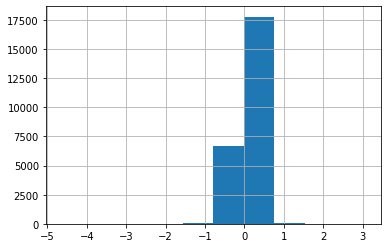

In [5]:
df.logerror.hist()

In [6]:
df['logerror_upper'] = my_toolkit.get_upper_outliers(df.logerror, k=2)
df['logerror_lower'] = my_toolkit.get_lower_outliers(df.logerror, k=2)

<AxesSubplot:>

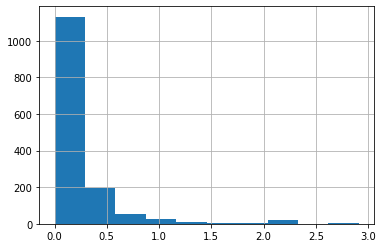

In [7]:
df[df.logerror_upper > 0].logerror_upper.hist()

In [8]:
df.logerror_upper.describe()

count    24603.000000
mean         0.013313
std          0.101824
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.911305
Name: logerror_upper, dtype: float64

In [9]:
df['logclass'] = 'mid'
df.loc[
    df['logerror_upper'] != 0,
    'logclass'] = 'high'
df.loc[
    df['logerror_lower'] != 0,
    'logclass'] = 'low'

df.logclass.value_counts()

mid     22346
high     1446
low       811
Name: logclass, dtype: int64

In [10]:
cols= [
 'logerror',
 'bedroomcnt',
 'calc_bath',
 'structure_sqft',
 'fips',
 'fullbathcnt',
 'lot_sqft',
 'roomcnt',
 'yearbuilt',
 'tax_structure',
 'tax',
 'tax_land',
 'heatingorsystemdesc',
 'bathroom_sum',
 'age',
 'logclass',
 ]

In [11]:
# sns.pairplot(data=df[df.logclass != 'mid'][cols], hue='logclass')

<AxesSubplot:xlabel='tax', ylabel='tax_land'>

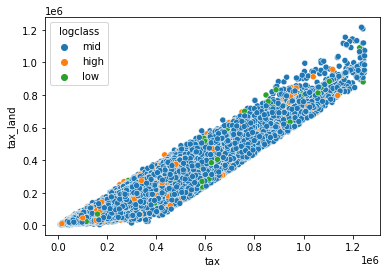

In [12]:
sns.scatterplot(data=df, x='tax', y='tax_land', hue='logclass')

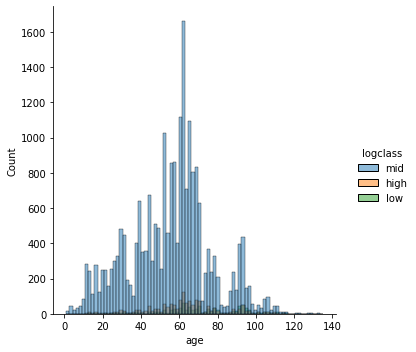

In [13]:
sns.displot(data=df, x='age', hue='logclass')

In [14]:
df.groupby('logclass').logerror.mean()

logclass
high    0.384571
low    -0.317201
mid     0.004404
Name: logerror, dtype: float64

In [15]:
df.logerror.describe()

count    24603.000000
mean         0.016146
std          0.159335
min         -4.655420
25%         -0.024325
50%          0.005702
75%          0.036470
max          3.069365
Name: logerror, dtype: float64

In [16]:
df['logclass'] = 'mid'
df.loc[
    df['logerror_upper'] != 0,
    'logclass'] = 'high'
df.loc[
    df['logerror_lower'] != 0,
    'logclass'] = 'low'
df.loc[
    df['logerror'] > .5,
    'logclass'] = 'very high'
df.loc[
    df['logerror'] < -.5,
    'logclass'] = 'very low'

df.logclass.value_counts()

mid          22346
high          1185
low            715
very high      261
very low        96
Name: logclass, dtype: int64

In [17]:
df.groupby('logclass').logerror.mean()

logclass
high         0.261644
low         -0.228462
mid          0.004404
very high    0.942690
very low    -0.978117
Name: logerror, dtype: float64

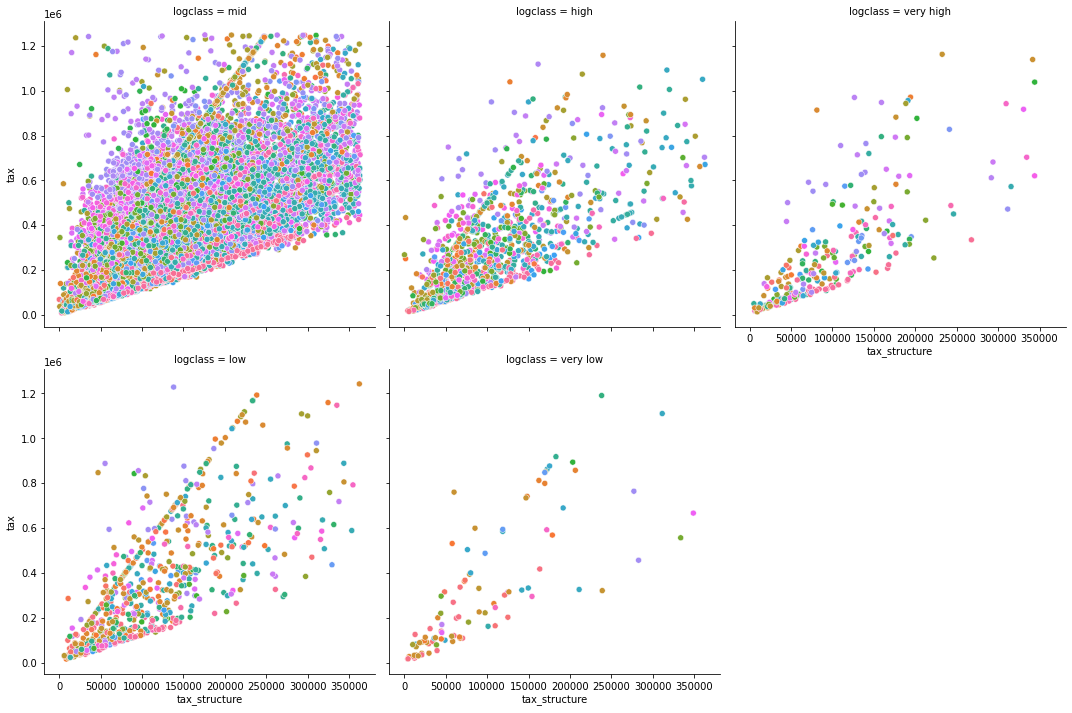

In [18]:
sns.relplot(kind='scatter', data=df, x='tax_structure', y='tax', col='logclass', hue='regionidzip', col_wrap=3, legend=False)

In [19]:
df['tax_structure_ratio'] = df.tax_structure / df.tax
df['tax_land_ratio'] = df.tax_land / df.tax

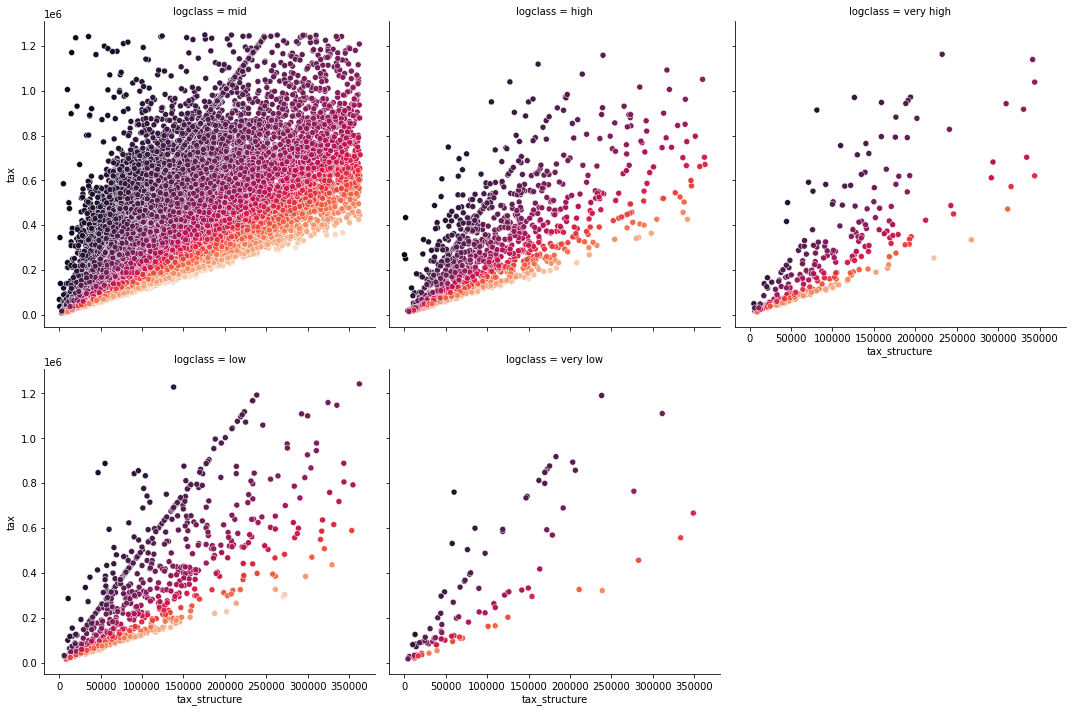

In [20]:
sns.relplot(kind='scatter', data=df, x='tax_structure', y='tax', col='logclass', hue='tax_structure_ratio', col_wrap=3, legend=False, palette='rocket')

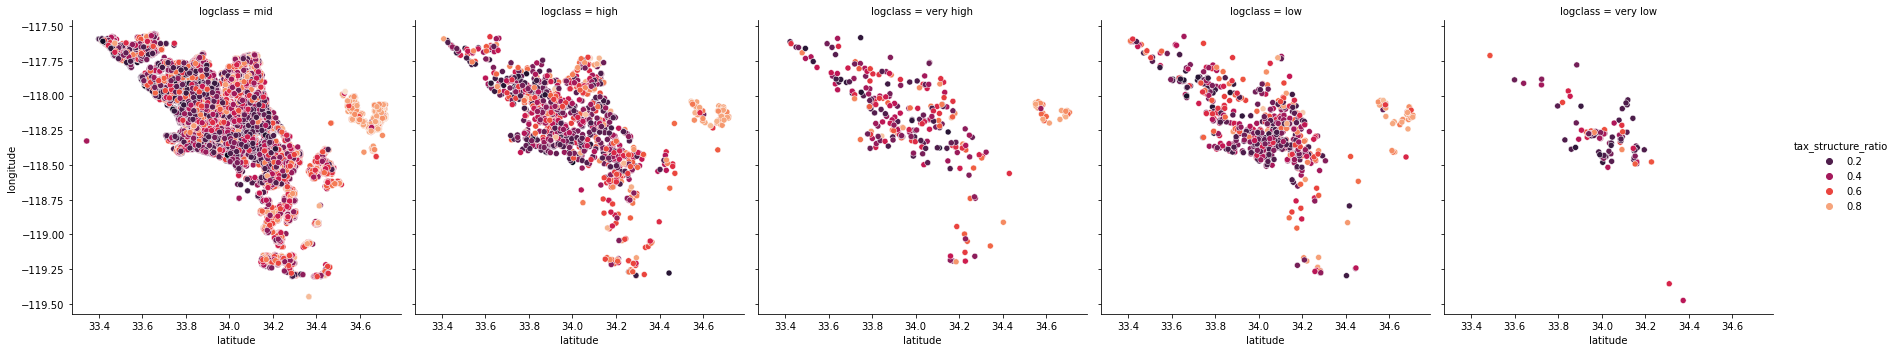

In [21]:
sns.relplot(data=df, x='latitude', y='longitude', hue='tax_structure_ratio', col='logclass', palette='rocket')

<AxesSubplot:xlabel='structure_sqft', ylabel='tax_structure_ratio'>

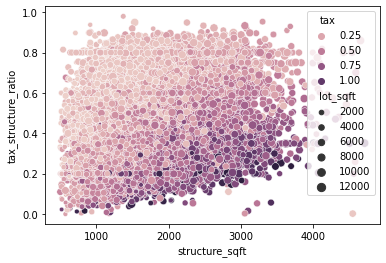

In [22]:
sns.scatterplot(data=df, x='structure_sqft', y='tax_structure_ratio', hue='tax', size='lot_sqft')

In [23]:
def scatter_vs_target(df, target, cat=None):
    for col in df:
        sns.scatterplot(data=df, x=col, y=target, hue=cat)
        plt.show()

# scatter_vs_target(df, 'tax_structure_ratio', cat='logclass')

### Scaler functions

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler

In [25]:
def df_scale_cols(df, cols, scaler, reverse=False):
    out = df.copy()
    if reverse:
        out[cols] = scaler.inverse_transform(out[cols])
    else:
        out[cols] = scaler.transform(out[cols])
    return out

def make_minmax_scaler(out, cols):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(out[cols])
    return scaler


In [26]:

scols = ['tax_structure', 'tax_land', 'tax']

scaler = make_minmax_scaler(df, scols)
df = df_scale_cols(df, scols, scaler)

df.head()

,parcelid,logerror,transactiondate,bedroomcnt,calc_bath,structure_sqft,fips,fullbathcnt,latitude,longitude,lot_sqft,regionidcity,regionidzip,roomcnt,yearbuilt,tax_structure,tax,tax_land,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age,logerror_upper,logerror_lower,logclass,tax_structure_ratio,tax_land_ratio
10842,10830173,0.031553,2017-03-10,3,1.0,1200,6037,1,34.195939,-118.460392,5854,12447.0,96414,0,1948,0.371975,0.158437,0.056155,False,Floor/Wall,0,1.0,69,0.0,0.0,mid,0.657640,0.342360
46666,11313407,-0.017430,2017-08-22,3,2.0,1361,6037,2,34.664841,-118.071279,6877,5534.0,97318,0,2010,0.414197,0.144356,0.029139,False,Central,0,2.0,7,0.0,0.0,mid,0.800121,0.199879
29083,13018855,0.125228,2017-06-02,3,2.0,1432,6037,2,34.119737,-117.913404,8522,37015.0,96464,0,1947,0.274481,0.093106,0.018601,False,Floor/Wall,0,2.0,70,0.0,0.0,mid,0.800850,0.199150
44486,11210636,-0.039696,2017-08-11,4,3.0,2175,6037,3,34.565561,-118.035941,8610,40227.0,97330,0,1988,0.476902,0.177129,0.043848,False,Central,0,3.0,29,0.0,0.0,mid,0.757585,0.242415
49011,12663563,0.052206,2017-08-31,2,1.0,686,6037,1,33.840374,-118.378213,3561,33612.0,96123,0,1926,0.027330,0.163499,0.164454,False,Floor/Wall,0,1.0,91,0.0,0.0,mid,0.047535,0.952465


### DBSCAN clustering

<AxesSubplot:xlabel='tax', ylabel='tax_structure'>

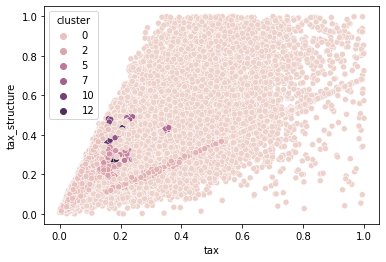

In [27]:
from sklearn.cluster import DBSCAN

clusterer = DBSCAN(eps=0.01, min_samples=50)
df['cluster'] = clusterer.fit_predict(df[['tax','tax_structure']])
sns.scatterplot(data=df, x='tax', y='tax_structure', hue='cluster')

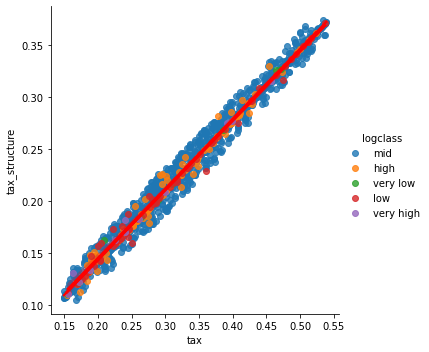

In [28]:
sns.lmplot(data=df[df.cluster == 1], x='tax', y='tax_structure', hue='logclass', line_kws={'color':'red'})

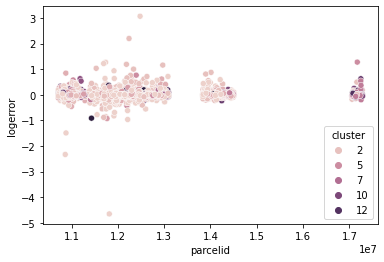

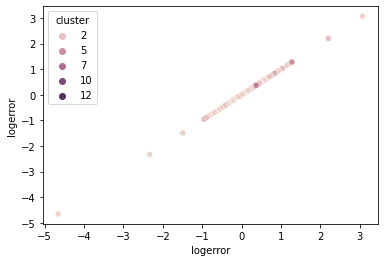

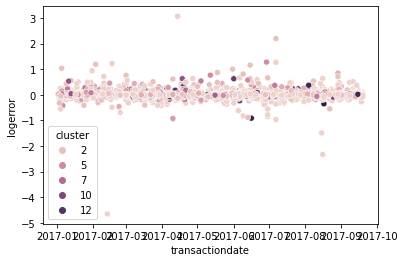

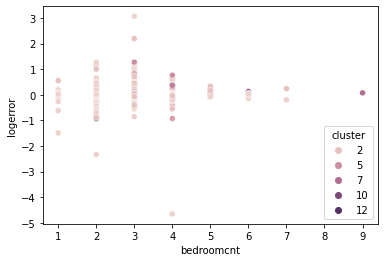

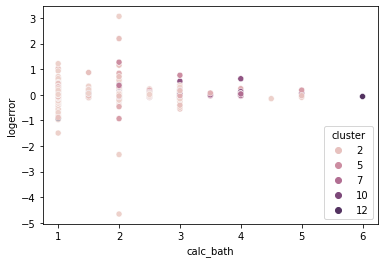

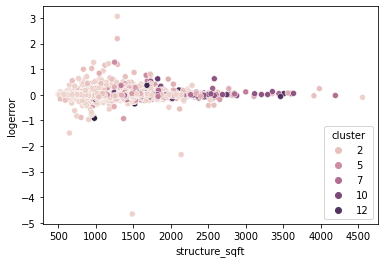

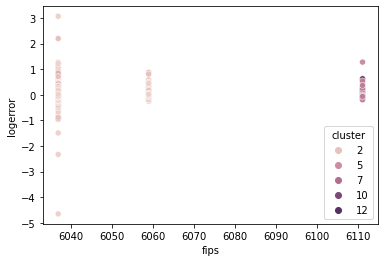

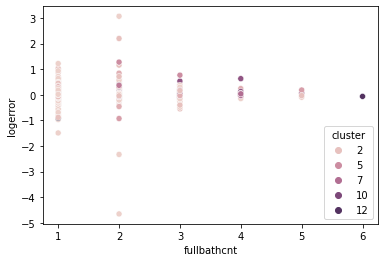

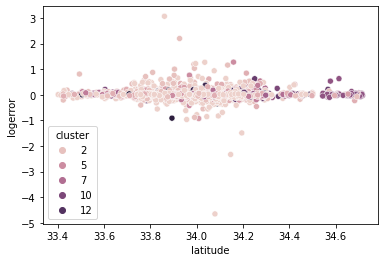

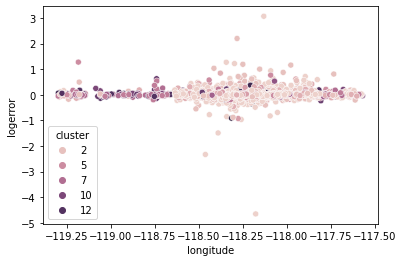

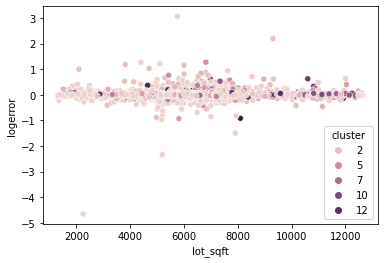

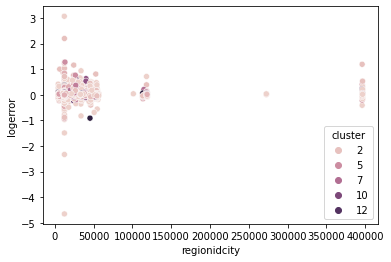

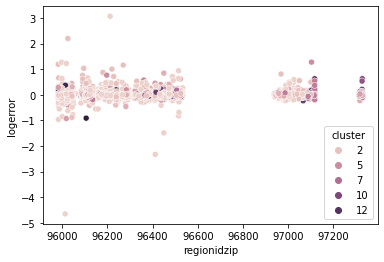

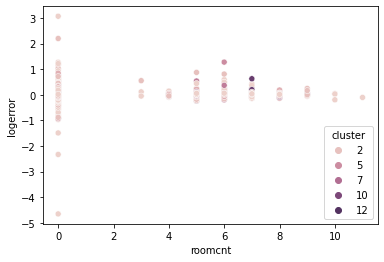

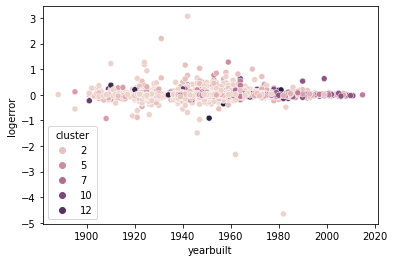

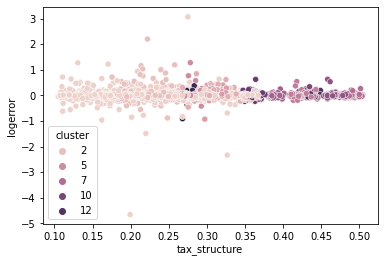

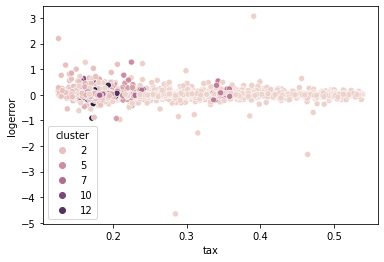

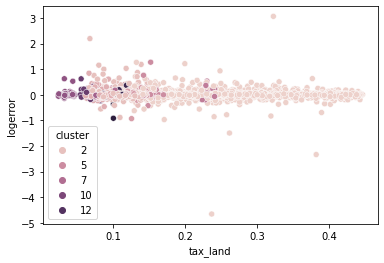

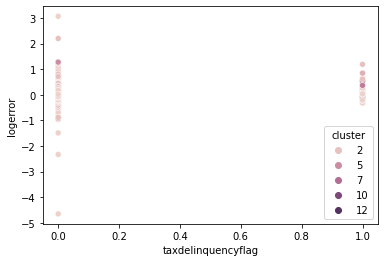

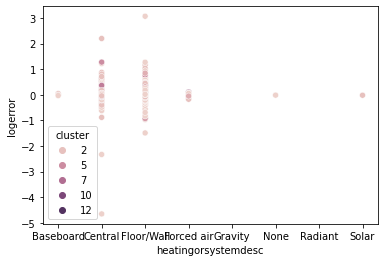

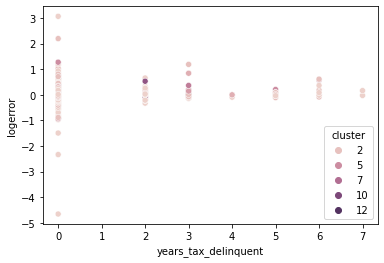

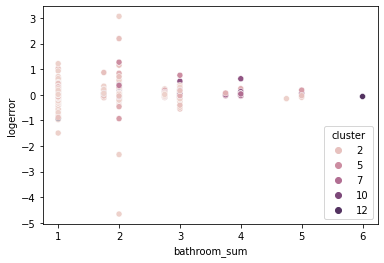

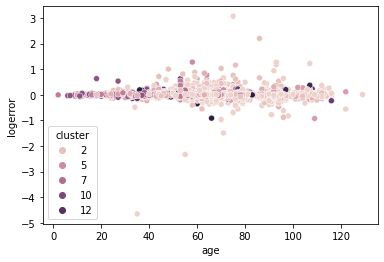

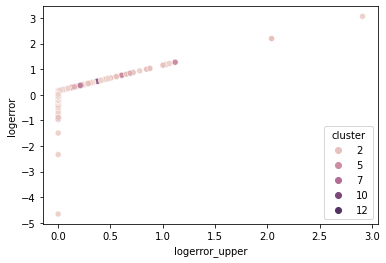

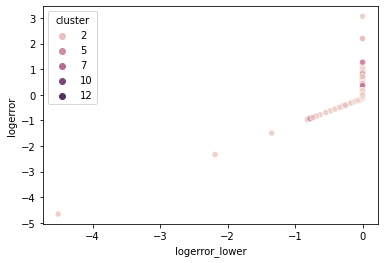

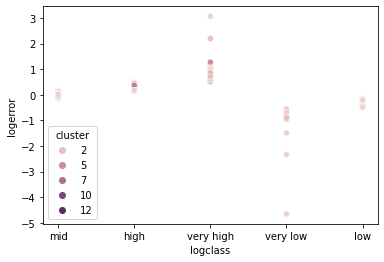

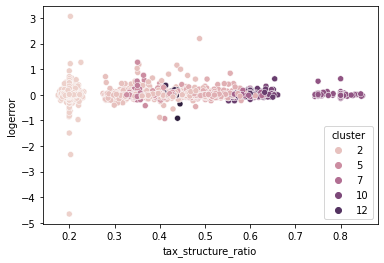

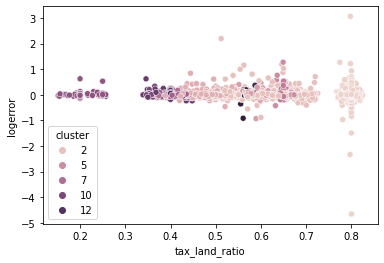

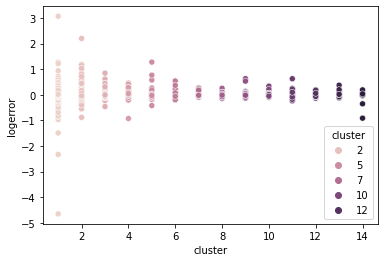

In [29]:
scatter_vs_target(df[df.cluster > 0], 'logerror', cat='cluster')

### Explore tax/structure ratio

In [30]:
# scatter_vs_target(df, 'tax_structure_ratio', cat='logclass')

<AxesSubplot:xlabel='tax', ylabel='logerror'>

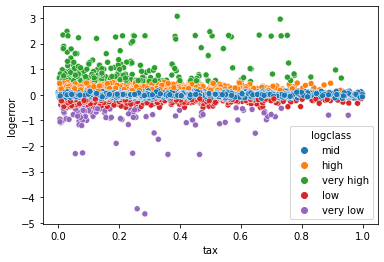

In [31]:
sns.scatterplot(data=df, y='logerror', x='tax', hue='logclass')


<AxesSubplot:xlabel='tax', ylabel='tax_structure'>

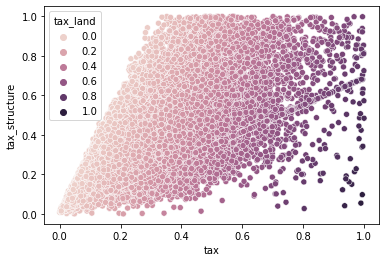

In [32]:
sns.scatterplot(data=df, y='tax_structure', x='tax', hue='tax_land')

<AxesSubplot:xlabel='tax_land', ylabel='tax_structure'>

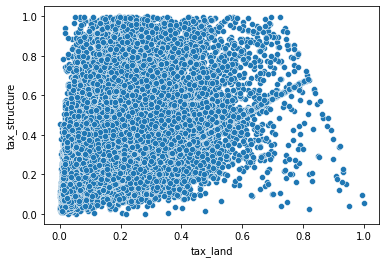

In [33]:
sns.scatterplot(data=df, x='tax_land', y='tax_structure')


<AxesSubplot:xlabel='tax_land', ylabel='tax_structure_ratio'>

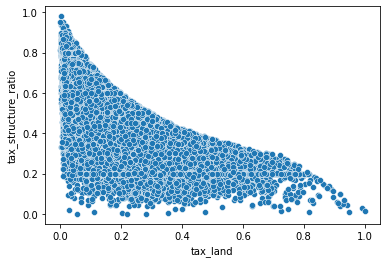

In [34]:
sns.scatterplot(data=df, x='tax_land', y='tax_structure_ratio')


This is unexpected and interesting but I don't know what to do with it.

In [35]:
df.columns.to_list()

['parcelid',
 'logerror',
 'transactiondate',
 'bedroomcnt',
 'calc_bath',
 'structure_sqft',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lot_sqft',
 'regionidcity',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'tax_structure',
 'tax',
 'tax_land',
 'taxdelinquencyflag',
 'heatingorsystemdesc',
 'years_tax_delinquent',
 'bathroom_sum',
 'age',
 'logerror_upper',
 'logerror_lower',
 'logclass',
 'tax_structure_ratio',
 'tax_land_ratio',
 'cluster']

### KMEANS clustering

In [36]:
df = df_scale_cols(df, scols, scaler, reverse=True)

In [37]:
df.head()

,parcelid,logerror,transactiondate,bedroomcnt,calc_bath,structure_sqft,fips,fullbathcnt,latitude,longitude,lot_sqft,regionidcity,regionidzip,roomcnt,yearbuilt,tax_structure,tax,tax_land,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age,logerror_upper,logerror_lower,logclass,tax_structure_ratio,tax_land_ratio,cluster
10842,10830173,0.031553,2017-03-10,3,1.0,1200,6037,1,34.195939,-118.460392,5854,12447.0,96414,0,1948,135247.0,205655.0,70408.0,False,Floor/Wall,0,1.0,69,0.0,0.0,mid,0.657640,0.342360,-1
46666,11313407,-0.017430,2017-08-22,3,2.0,1361,6037,2,34.664841,-118.071279,6877,5534.0,97318,0,2010,150582.0,188199.0,37617.0,False,Central,0,2.0,7,0.0,0.0,mid,0.800121,0.199879,0
29083,13018855,0.125228,2017-06-02,3,2.0,1432,6037,2,34.119737,-117.913404,8522,37015.0,96464,0,1947,99838.0,124665.0,24827.0,False,Floor/Wall,0,2.0,70,0.0,0.0,mid,0.800850,0.199150,0
44486,11210636,-0.039696,2017-08-11,4,3.0,2175,6037,3,34.565561,-118.035941,8610,40227.0,97330,0,1988,173356.0,228827.0,55471.0,False,Central,0,3.0,29,0.0,0.0,mid,0.757585,0.242415,9
49011,12663563,0.052206,2017-08-31,2,1.0,686,6037,1,33.840374,-118.378213,3561,33612.0,96123,0,1926,10074.0,211930.0,201856.0,False,Floor/Wall,0,1.0,91,0.0,0.0,mid,0.047535,0.952465,-1


In [38]:
# df = df_scale_cols(df, scale_cols, scaler, reverse=True)

In [39]:
scale_cols = [
 'logerror',
 'bedroomcnt',
 'calc_bath',
 'structure_sqft',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lot_sqft',
 'roomcnt',
 'tax_structure',
 'tax',
 'tax_land',
 'years_tax_delinquent',
 'bathroom_sum',
 'age',
 'logerror_upper',
 'logerror_lower',
 'tax_structure_ratio',
 'tax_land_ratio',
 ]

In [40]:
scaler = make_minmax_scaler(df, scale_cols)
xf = df_scale_cols(df, scale_cols, scaler=scaler)
xf.head()

,parcelid,logerror,transactiondate,bedroomcnt,calc_bath,structure_sqft,fips,fullbathcnt,latitude,longitude,lot_sqft,regionidcity,regionidzip,roomcnt,yearbuilt,tax_structure,tax,tax_land,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age,logerror_upper,logerror_lower,logclass,tax_structure_ratio,tax_land_ratio,cluster
10842,10830173,0.606745,2017-03-10,0.2,0.000000,0.166350,6037,0.000000,0.619831,0.528407,0.400547,12447.0,96414,0.0,1948,0.371975,0.158437,0.056155,False,Floor/Wall,0.0,0.000000,0.507463,0.0,1.0,mid,0.671262,0.328738,-1
46666,11313407,0.600404,2017-08-22,0.2,0.153846,0.204610,6037,0.166667,0.961083,0.731003,0.490782,5534.0,97318,0.0,2010,0.414197,0.144356,0.029139,False,Central,0.0,0.148148,0.044776,0.0,1.0,mid,0.816816,0.183184,0
29083,13018855,0.618871,2017-06-02,0.2,0.153846,0.221483,6037,0.166667,0.564374,0.813203,0.635883,37015.0,96464,0.0,1947,0.274481,0.093106,0.018601,False,Floor/Wall,0.0,0.148148,0.514925,0.0,1.0,mid,0.817560,0.182440,0
44486,11210636,0.597521,2017-08-11,0.3,0.307692,0.398051,6037,0.333333,0.888830,0.749402,0.643645,40227.0,97330,0.0,1988,0.476902,0.177129,0.043848,False,Central,0.0,0.296296,0.208955,0.0,1.0,mid,0.773362,0.226638,9
49011,12663563,0.609418,2017-08-31,0.1,0.000000,0.044202,6037,0.000000,0.361062,0.571194,0.198289,33612.0,96123,0.0,1926,0.027330,0.163499,0.164454,False,Floor/Wall,0.0,0.000000,0.671642,0.0,1.0,mid,0.047997,0.952003,-1


In [41]:
def find_k(df, cluster_vars, k_range):
    from sklearn.cluster import KMeans
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our df dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(df[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

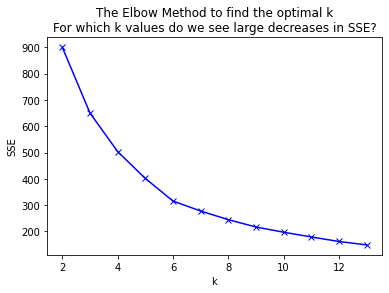

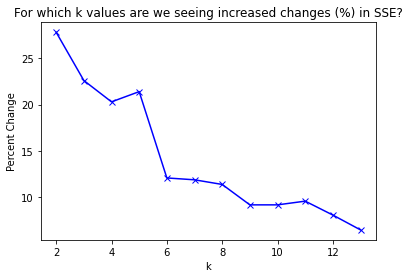

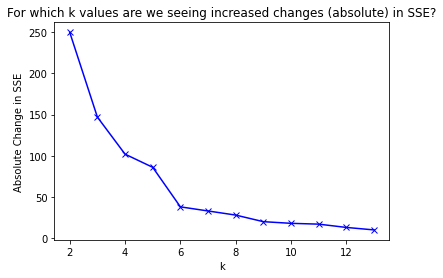

,k,sse,delta,pct_delta
0,2,900.445201,250.0,27.8
1,3,650.273211,147.0,22.6
2,4,503.552648,102.0,20.3
3,5,401.435611,86.0,21.4
4,6,315.362355,38.0,12.1
5,7,277.319927,33.0,11.9
6,8,244.427286,28.0,11.4
7,9,216.576221,20.0,9.2
8,10,196.679417,18.0,9.2
9,11,178.673827,17.0,9.6


In [67]:
cluster_cols = ['age','tax']
find_k(xf, cluster_cols, range(2, 15))

<AxesSubplot:xlabel='tax', ylabel='tax_structure'>

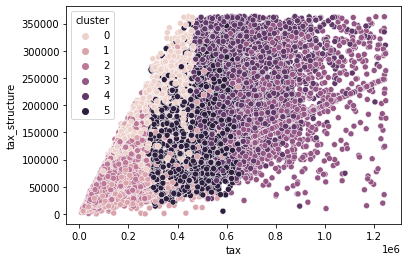

In [69]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=6)
df['cluster'] = clusterer.fit_predict(xf[cluster_cols])
sns.scatterplot(data=df, x='tax', y='tax_structure', hue='cluster')


In [44]:
# scatter_vs_target(df, 'logerror', 'cluster')

c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='logerror'>

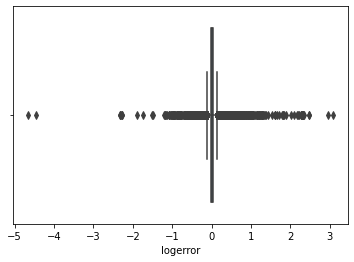

In [45]:
sns.boxplot(df.logerror)

In [46]:
loop_cols = [
 'bedroomcnt',
 'calc_bath',
 'structure_sqft',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lot_sqft',
 'roomcnt',
 'tax_structure',
 'tax',
 'tax_land',
 'years_tax_delinquent',
 'bathroom_sum',
 'age',
 'tax_structure_ratio',
 'tax_land_ratio',
 ]

In [47]:
import itertools
loop_combos = list(itertools.combinations(loop_cols, 3))

In [48]:
df.cluster.sort_values().unique()

array([0, 1, 2, 3, 4, 5])

In [49]:
from scipy.stats import f_oneway
def anova_variance_in_categorical_series(s):
    vals = s.sort_values().unique()
    subsets = [s[s == vals[x]] for x in vals]
    f_oneway(subsets)

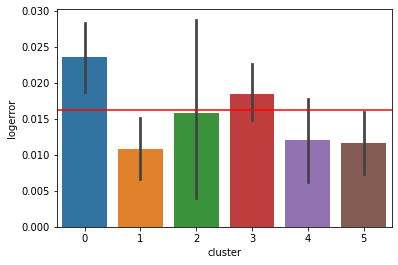

In [50]:
sns.barplot(data=df, y='logerror', x='cluster')
plt.axhline(df.logerror.mean(), color='red')

In [100]:
s = df.cluster
vals = s.sort_values().unique()
subsets = [df[s == vals[x]]['logerror'] for x in vals]
subsets[1]

f_oneway(*subsets)

F_onewayResult(statistic=12.39334627940654, pvalue=4.935708234730883e-12)

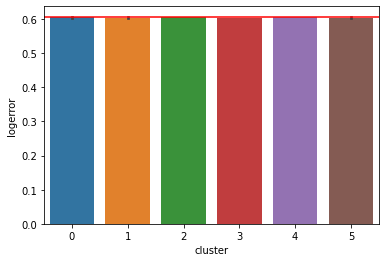

In [70]:
xf = df_scale_cols(df, scale_cols, scaler=scaler)
sns.barplot(data=xf, y='logerror', x='cluster')
plt.axhline(xf.logerror.mean(), color='red')

<AxesSubplot:xlabel='age', ylabel='tax'>

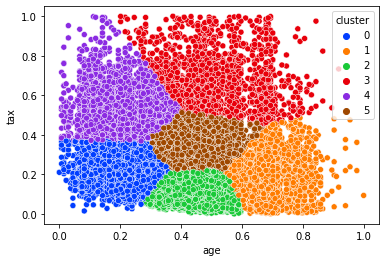

In [71]:
sns.scatterplot(data=xf, x='age', y='tax', hue='cluster', palette='bright')

<AxesSubplot:xlabel='age', ylabel='logerror'>

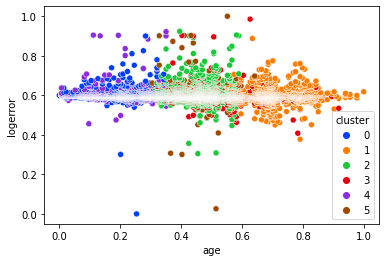

In [72]:
sns.scatterplot(data=xf.sort_values(by='logerror'), x='age', y='logerror', hue='cluster', palette='bright')

In [56]:
df.drop(columns=['logerror', 'logerror_upper', 'logerror_lower' ]).head()

,parcelid,transactiondate,bedroomcnt,calc_bath,structure_sqft,fips,fullbathcnt,latitude,longitude,lot_sqft,regionidcity,regionidzip,roomcnt,yearbuilt,tax_structure,tax,tax_land,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age,logclass,tax_structure_ratio,tax_land_ratio,cluster
10842,10830173,2017-03-10,3,1.0,1200,6037,1,34.195939,-118.460392,5854,12447.0,96414,0,1948,135247.0,205655.0,70408.0,False,Floor/Wall,0,1.0,69,mid,0.657640,0.342360,3
46666,11313407,2017-08-22,3,2.0,1361,6037,2,34.664841,-118.071279,6877,5534.0,97318,0,2010,150582.0,188199.0,37617.0,False,Central,0,2.0,7,mid,0.800121,0.199879,3
29083,13018855,2017-06-02,3,2.0,1432,6037,2,34.119737,-117.913404,8522,37015.0,96464,0,1947,99838.0,124665.0,24827.0,False,Floor/Wall,0,2.0,70,mid,0.800850,0.199150,0
44486,11210636,2017-08-11,4,3.0,2175,6037,3,34.565561,-118.035941,8610,40227.0,97330,0,1988,173356.0,228827.0,55471.0,False,Central,0,3.0,29,mid,0.757585,0.242415,3
49011,12663563,2017-08-31,2,1.0,686,6037,1,33.840374,-118.378213,3561,33612.0,96123,0,1926,10074.0,211930.0,201856.0,False,Floor/Wall,0,1.0,91,mid,0.047535,0.952465,3


In [57]:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier(max_depth=10)
x = df[scale_cols].drop(columns=['logerror', 'logerror_upper', 'logerror_lower' ])
y = df.logclass
tree.fit(x, y)
tree.feature_importances_, x.columns

(array([0.02540121, 0.01886526, 0.09412649, 0.01560463, 0.11393208,
        0.10763259, 0.10581678, 0.01376082, 0.12387733, 0.08472341,
        0.04805642, 0.04327616, 0.00777743, 0.1126676 , 0.04896876,
        0.03551304]),
 Index(['bedroomcnt', 'calc_bath', 'structure_sqft', 'fullbathcnt', 'latitude',
        'longitude', 'lot_sqft', 'roomcnt', 'tax_structure', 'tax', 'tax_land',
        'years_tax_delinquent', 'bathroom_sum', 'age', 'tax_structure_ratio',
        'tax_land_ratio'],
       dtype='object'))

In [58]:
# using dictionary comprehension
# to convert lists to dictionary
res = {x.columns[i]: tree.feature_importances_[i] for i in range(len(x.columns))}
res

{'bedroomcnt': 0.0254012064750847,
 'calc_bath': 0.018865256306659833,
 'structure_sqft': 0.09412649499182711,
 'fullbathcnt': 0.015604627791977462,
 'latitude': 0.11393208258745535,
 'longitude': 0.10763258596174885,
 'lot_sqft': 0.10581678143739788,
 'roomcnt': 0.013760817357419432,
 'tax_structure': 0.12387732984993055,
 'tax': 0.08472340722881483,
 'tax_land': 0.04805641601927733,
 'years_tax_delinquent': 0.04327616055499367,
 'bathroom_sum': 0.0077774278834337,
 'age': 0.11266759559197165,
 'tax_structure_ratio': 0.04896876497410319,
 'tax_land_ratio': 0.035513044987904495}

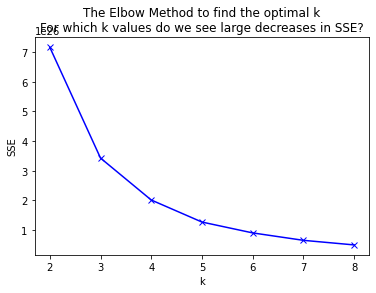

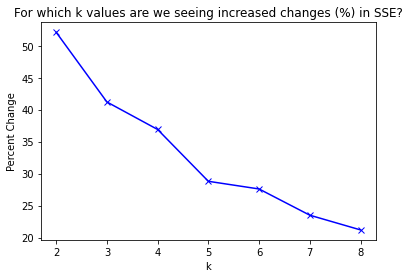

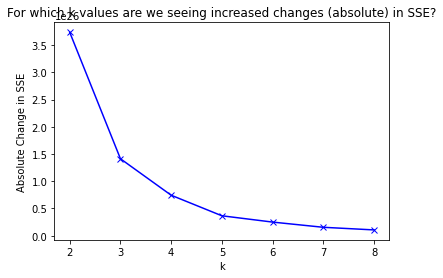

,k,sse,delta,pct_delta
0,2,7.165383e+26,3.736470e+26,52.1
1,3,3.428913e+26,1.413300e+26,41.2
2,4,2.015613e+26,7.434206e+25,36.9
3,5,1.272193e+26,3.659026e+25,28.8
4,6,9.062903e+25,2.500558e+25,27.6
5,7,6.562345e+25,1.545333e+25,23.5
6,8,5.017011e+25,1.063786e+25,21.2


In [59]:
cluster2_cols = ['latitude','longitude','age', 'tax']
find_k(xf, cluster2_cols, range(2,10))

In [60]:
def get_kmeans_clusters(df, cols, k, clusterer=None):
    if clusterer == None:
        from sklearn.cluster import KMeans
        clusterer = KMeans(n_clusters=k)
        clusterer.fit(df[cols])
    s = clusterer.predict(df[cols])
    return s

In [76]:
df['cluster2'] = get_kmeans_clusters(xf, cluster2_cols, 5)
df.head()

,parcelid,logerror,transactiondate,bedroomcnt,calc_bath,structure_sqft,fips,fullbathcnt,latitude,longitude,lot_sqft,regionidcity,regionidzip,roomcnt,yearbuilt,tax_structure,tax,tax_land,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age,logerror_upper,logerror_lower,logclass,tax_structure_ratio,tax_land_ratio,cluster,cluster2
10842,10830173,0.031553,2017-03-10,3,1.0,1200,6037,1,34.195939,-118.460392,5854,12447.0,96414,0,1948,135247.0,205655.0,70408.0,False,Floor/Wall,0,1.0,69,0.0,0.0,mid,0.657640,0.342360,2,2
46666,11313407,-0.017430,2017-08-22,3,2.0,1361,6037,2,34.664841,-118.071279,6877,5534.0,97318,0,2010,150582.0,188199.0,37617.0,False,Central,0,2.0,7,0.0,0.0,mid,0.800121,0.199879,0,3
29083,13018855,0.125228,2017-06-02,3,2.0,1432,6037,2,34.119737,-117.913404,8522,37015.0,96464,0,1947,99838.0,124665.0,24827.0,False,Floor/Wall,0,2.0,70,0.0,0.0,mid,0.800850,0.199150,2,2
44486,11210636,-0.039696,2017-08-11,4,3.0,2175,6037,3,34.565561,-118.035941,8610,40227.0,97330,0,1988,173356.0,228827.0,55471.0,False,Central,0,3.0,29,0.0,0.0,mid,0.757585,0.242415,0,3
49011,12663563,0.052206,2017-08-31,2,1.0,686,6037,1,33.840374,-118.378213,3561,33612.0,96123,0,1926,10074.0,211930.0,201856.0,False,Floor/Wall,0,1.0,91,0.0,0.0,mid,0.047535,0.952465,1,2


In [62]:
xf.head()

,parcelid,logerror,transactiondate,bedroomcnt,calc_bath,structure_sqft,fips,fullbathcnt,latitude,longitude,lot_sqft,regionidcity,regionidzip,roomcnt,yearbuilt,tax_structure,tax,tax_land,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age,logerror_upper,logerror_lower,logclass,tax_structure_ratio,tax_land_ratio,cluster
10842,10830173,-4.411683,2017-03-10,31.0,7.5,5050100.0,6037,7.0,80.331627,-346.993729,66368111.0,12447.0,96414,0.0,1948,4.912090e+10,2.549483e+11,8.545771e+10,False,Floor/Wall,0.0,7.75,9247.0,0.0,-4.509506,mid,0.644307,0.355693,3
46666,11313407,-4.790066,2017-08-22,31.0,14.0,5727588.0,6037,13.0,80.975927,-346.246388,77965862.0,5534.0,97318,0.0,2010,5.469048e+10,2.333082e+11,4.565764e+10,False,Central,0.0,14.50,939.0,0.0,-4.509506,mid,0.783779,0.216221,3
29083,13018855,-3.688060,2017-06-02,31.0,14.0,6026356.0,6037,13.0,80.226920,-345.943168,96615227.0,37015.0,96464,0.0,1947,3.626056e+10,1.545458e+11,3.013377e+10,False,Floor/Wall,0.0,14.50,9381.0,0.0,-4.509506,mid,0.784493,0.215507,0
44486,11210636,-4.962063,2017-08-11,41.0,20.5,9152900.0,6037,19.0,80.839510,-346.178516,97612883.0,40227.0,97330,0.0,1988,6.296186e+10,2.836743e+11,6.732793e+10,False,Central,0.0,21.25,3887.0,0.0,-4.509506,mid,0.742142,0.257858,3
49011,12663563,-4.252142,2017-08-31,21.0,7.5,2887188.0,6037,7.0,79.843058,-346.835894,40372370.0,33612.0,96123,0.0,1926,3.658817e+09,2.627273e+11,2.450027e+11,False,Floor/Wall,0.0,7.75,12195.0,0.0,-4.509506,mid,0.047082,0.952918,3


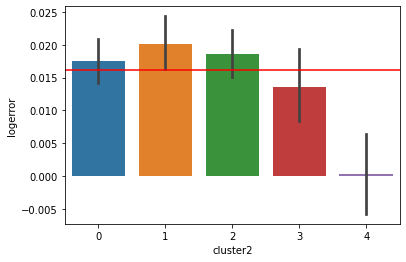

In [77]:
sns.barplot(data=df, y='logerror', x='cluster2')
plt.axhline(df.logerror.mean(), color='red')

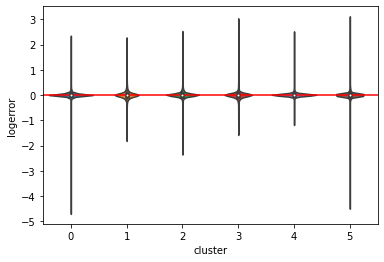

In [87]:
sns.violinplot(data=df, y='logerror', x='cluster')
plt.axhline(df.logerror.mean(), color='red')

In [78]:
df.cluster2.value_counts()

2    10045
1     5370
0     4467
4     3018
3     1703
Name: cluster2, dtype: int64

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

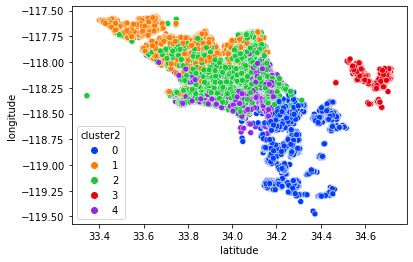

In [88]:
sns.scatterplot(data=df, x='latitude', y='longitude', hue='cluster2', palette='bright')

In [64]:
xf.head()

,parcelid,logerror,transactiondate,bedroomcnt,calc_bath,structure_sqft,fips,fullbathcnt,latitude,longitude,lot_sqft,regionidcity,regionidzip,roomcnt,yearbuilt,tax_structure,tax,tax_land,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age,logerror_upper,logerror_lower,logclass,tax_structure_ratio,tax_land_ratio,cluster,cluster2
10842,10830173,0.606745,2017-03-10,0.2,0.000000,0.166350,6037,0.000000,0.619831,0.528407,0.400547,12447.0,96414,0.0,1948,0.371975,0.158437,0.056155,False,Floor/Wall,0.0,0.000000,0.507463,0.0,1.0,mid,0.671262,0.328738,3,0
46666,11313407,0.600404,2017-08-22,0.2,0.153846,0.204610,6037,0.166667,0.961083,0.731003,0.490782,5534.0,97318,0.0,2010,0.414197,0.144356,0.029139,False,Central,0.0,0.148148,0.044776,0.0,1.0,mid,0.816816,0.183184,3,0
29083,13018855,0.618871,2017-06-02,0.2,0.153846,0.221483,6037,0.166667,0.564374,0.813203,0.635883,37015.0,96464,0.0,1947,0.274481,0.093106,0.018601,False,Floor/Wall,0.0,0.148148,0.514925,0.0,1.0,mid,0.817560,0.182440,0,0
44486,11210636,0.597521,2017-08-11,0.3,0.307692,0.398051,6037,0.333333,0.888830,0.749402,0.643645,40227.0,97330,0.0,1988,0.476902,0.177129,0.043848,False,Central,0.0,0.296296,0.208955,0.0,1.0,mid,0.773362,0.226638,3,0
49011,12663563,0.609418,2017-08-31,0.1,0.000000,0.044202,6037,0.000000,0.361062,0.571194,0.198289,33612.0,96123,0.0,1926,0.027330,0.163499,0.164454,False,Floor/Wall,0.0,0.000000,0.671642,0.0,1.0,mid,0.047997,0.952003,3,0


In [65]:
df.head()

,parcelid,logerror,transactiondate,bedroomcnt,calc_bath,structure_sqft,fips,fullbathcnt,latitude,longitude,lot_sqft,regionidcity,regionidzip,roomcnt,yearbuilt,tax_structure,tax,tax_land,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age,logerror_upper,logerror_lower,logclass,tax_structure_ratio,tax_land_ratio,cluster,cluster2
10842,10830173,0.031553,2017-03-10,3,1.0,1200,6037,1,34.195939,-118.460392,5854,12447.0,96414,0,1948,135247.0,205655.0,70408.0,False,Floor/Wall,0,1.0,69,0.0,0.0,mid,0.657640,0.342360,3,0
46666,11313407,-0.017430,2017-08-22,3,2.0,1361,6037,2,34.664841,-118.071279,6877,5534.0,97318,0,2010,150582.0,188199.0,37617.0,False,Central,0,2.0,7,0.0,0.0,mid,0.800121,0.199879,3,0
29083,13018855,0.125228,2017-06-02,3,2.0,1432,6037,2,34.119737,-117.913404,8522,37015.0,96464,0,1947,99838.0,124665.0,24827.0,False,Floor/Wall,0,2.0,70,0.0,0.0,mid,0.800850,0.199150,0,0
44486,11210636,-0.039696,2017-08-11,4,3.0,2175,6037,3,34.565561,-118.035941,8610,40227.0,97330,0,1988,173356.0,228827.0,55471.0,False,Central,0,3.0,29,0.0,0.0,mid,0.757585,0.242415,3,0
49011,12663563,0.052206,2017-08-31,2,1.0,686,6037,1,33.840374,-118.378213,3561,33612.0,96123,0,1926,10074.0,211930.0,201856.0,False,Floor/Wall,0,1.0,91,0.0,0.0,mid,0.047535,0.952465,3,0


In [91]:
c1 = pd.get_dummies(df.cluster, prefix='cluster1')
c2 = pd.get_dummies(df.cluster2, prefix='cluster2')

In [92]:
pd.concat([df, c1, c2], axis=1)

,parcelid,logerror,transactiondate,bedroomcnt,calc_bath,structure_sqft,fips,fullbathcnt,latitude,longitude,lot_sqft,regionidcity,regionidzip,roomcnt,yearbuilt,tax_structure,tax,tax_land,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age,logerror_upper,logerror_lower,logclass,tax_structure_ratio,tax_land_ratio,cluster,cluster2,cluster1_0,cluster1_1,cluster1_2,cluster1_3,cluster1_4,cluster1_5,cluster2_0,cluster2_1,cluster2_2,cluster2_3,cluster2_4
10842,10830173,0.031553,2017-03-10,3,1.0,1200,6037,1,34.195939,-118.460392,5854,12447.0,96414,0,1948,135247.0,205655.0,70408.0,False,Floor/Wall,0,1.00,69,0.0,0.0,mid,0.657640,0.342360,2,2,0,0,1,0,0,0,0,0,1,0,0
46666,11313407,-0.017430,2017-08-22,3,2.0,1361,6037,2,34.664841,-118.071279,6877,5534.0,97318,0,2010,150582.0,188199.0,37617.0,False,Central,0,2.00,7,0.0,0.0,mid,0.800121,0.199879,0,3,1,0,0,0,0,0,0,0,0,1,0
29083,13018855,0.125228,2017-06-02,3,2.0,1432,6037,2,34.119737,-117.913404,8522,37015.0,96464,0,1947,99838.0,124665.0,24827.0,False,Floor/Wall,0,2.00,70,0.0,0.0,mid,0.800850,0.199150,2,2,0,0,1,0,0,0,0,0,1,0,0
44486,11210636,-0.039696,2017-08-11,4,3.0,2175,6037,3,34.565561,-118.035941,8610,40227.0,97330,0,1988,173356.0,228827.0,55471.0,False,Central,0,3.00,29,0.0,0.0,mid,0.757585,0.242415,0,3,1,0,0,0,0,0,0,0,0,1,0
49011,12663563,0.052206,2017-08-31,2,1.0,686,6037,1,33.840374,-118.378213,3561,33612.0,96123,0,1926,10074.0,211930.0,201856.0,False,Floor/Wall,0,1.00,91,0.0,0.0,mid,0.047535,0.952465,1,2,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10665,11468416,0.071620,2017-03-09,3,2.0,1922,6037,2,33.956711,-118.389610,6131,12447.0,96026,0,1942,190708.0,336159.0,145451.0,False,Floor/Wall,0,2.00,75,0.0,0.0,mid,0.567315,0.432685,5,2,0,0,0,0,0,1,0,0,1,0,0
35883,14374422,0.022948,2017-06-30,2,2.0,1560,6059,2,33.647361,-117.696759,4905,32380.0,96962,6,1976,118868.0,649648.0,530780.0,False,Central,0,2.00,41,0.0,0.0,mid,0.182973,0.817027,4,1,0,0,0,0,1,0,0,1,0,0,0
18923,14464822,0.014963,2017-04-20,3,2.5,1703,6059,2,33.554938,-117.632499,2102,52835.0,96998,0,2002,201558.0,569544.0,367986.0,False,Central,0,2.75,15,0.0,0.0,mid,0.353894,0.646106,4,1,0,0,0,0,1,0,0,1,0,0,0
26635,13891784,-0.000947,2017-05-24,3,2.5,2320,6059,2,33.607055,-117.892727,2550,53571.0,96980,5,2000,336053.0,1110474.0,774421.0,False,Central,0,2.75,17,0.0,0.0,mid,0.302621,0.697379,4,1,0,0,0,0,1,0,0,1,0,0,0


In [97]:
s = df.heatingorsystemdesc
vals = s.sort_values().unique()
(vals)

[('Baseboard',),
 ('Central',),
 ('Floor/Wall',),
 ('Forced air',),
 ('Gravity',),
 ('None',),
 ('Radiant',),
 ('Solar',)]

In [ ]:
s = df.cluster
vals = s.sort_values().unique()
subsets = [df[s == vals[x]]['logerror'] for x in vals]
subsets[1]

f_oneway(*subsets)

In [112]:
def anova_variance_in_target_for_cat(df, target, cat, alpha=0.5):
    # from scipy.stats import f_oneway
    s= df[cat]
    vals = s.sort_values().unique()
    subsets = [df[s == vals[x]][target] for x, v in enumerate(vals)]
    stat, p = f_oneway(*subsets)
    result={'reject': p < alpha,
            'h0' : f"There is no variance in {target} between subsets of {cat}",
            'stat_name': 'F',
            'stat': stat
        }
    return result

anova_variance_in_target_for_cat(df,'logerror','heatingorsystemdesc')

{'reject': False,
 'h0': 'There is no variance in logerror between subsets of heatingorsystemdesc',
 'stat_name': 'F',
 'stat': 0.7401138276618254}